## Importing necessary libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Import Data

## Excel file conatins 2 worksheet,therefore need to import them separately 

In [19]:
xls = pd.ExcelFile('EastWestAirlines.xlsx')
Description = pd.read_excel(xls, 'Description')
airline_data = pd.read_excel(xls, 'data')

In [20]:
Description

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [21]:
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data understanding

In [22]:
airline_data.shape

(3999, 12)

In [23]:
airline_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [24]:
airline_data.describe(include='all')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [25]:
airline_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

## Data preparation

In [80]:
airline_data = airline_data.drop(['ID#'],axis=1)
airline_data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [81]:
# Normalize heterogenous numerical data by using Standard Scaler

scaler = StandardScaler()
airline_data_scaler = scaler.fit_transform(airline_data)

In [30]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 

In [82]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline_data_scaler)
    wcss.append(kmeans.inertia_)

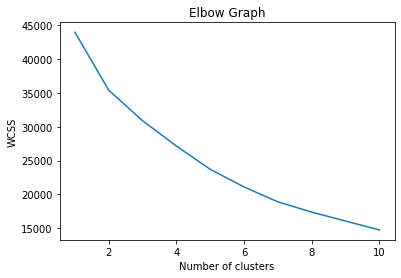

In [83]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster algorithm using K=4


In [84]:
# Cluster algorithm using K=4

clusters_4=KMeans(4,random_state=30).fit(airline_data_scaler)
clusters_4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [85]:
clusters_4.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [86]:
# Assign clusters to the data set  

airline_data =airline_data.copy()
airline_data ['clusters_4_id']=clusters_4.labels_
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_4_id
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [87]:
# Compute the centroids for K=4 clusters with 11 variables

clusters_4.cluster_centers_

array([[ 4.21746010e-01, -1.01103166e-02,  1.18776700e+00,
        -8.23786348e-02, -5.47688882e-02,  9.02825341e-01,
         7.41241194e-01, -9.45981390e-02, -1.04678145e-01,
         3.69614002e-01,  5.61908485e-01],
       [ 1.19930860e+00,  1.02758112e+00,  1.04575116e-01,
         1.38046790e-01, -6.27665798e-02,  6.25951749e-01,
         1.56054548e+00,  3.42709017e+00,  3.68477621e+00,
         2.85274660e-01,  9.18646074e-01],
       [-2.98748917e-01, -6.42142013e-02, -6.14321497e-01,
         3.28947498e-02, -6.07426678e-02, -5.18324114e-01,
        -4.91372184e-01, -1.85214810e-01, -1.97781208e-01,
        -2.07878651e-01, -3.48824498e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [88]:
# Group data by Clusters (K=4)

airline_data.groupby('clusters_4_id').agg(['mean']).reset_index()

,clusters_4_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116091.697656,136.400000,3.695312,1.002344,1.001562,38957.671875,18.723437,327.871094,0.977344,4883.627344,0.642188
1,1,194447.337209,939.017442,2.203488,1.034884,1.000000,32260.296512,26.587209,5258.098837,15.348837,4707.616279,0.813953
2,2,43530.202607,94.403239,1.214455,1.019352,1.000395,4636.149684,6.886256,200.669431,0.623223,3688.845972,0.201817
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


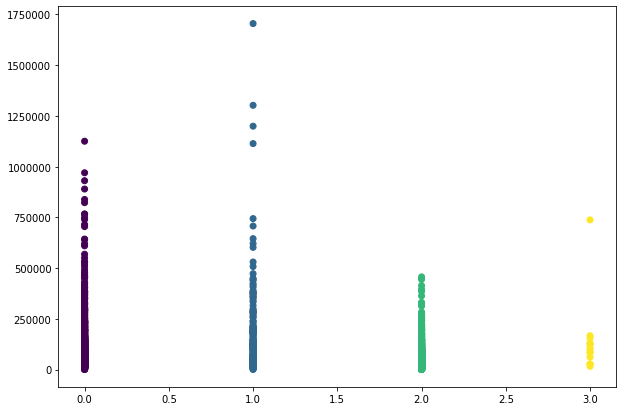

In [89]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters_4_id'],airline_data['Balance'], c=clusters_4.labels_)

## Build cluster algorithm  using K=5

In [90]:
# Cluster algorithm using K=5

clusters_5=KMeans(5,random_state=30).fit(airline_data_scaler)
clusters_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [45]:
clusters_5.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [91]:
# Assign clusters to the data set

airline_data = airline_data.copy()
airline_data['clusters_5_id']=clusters_5.labels_
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_4_id,clusters_5_id
0,28143,0,1,1,1,174,1,0,0,7000,0,2,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,2


In [48]:
# Compute the centroids for K=5 clusters with 11 variables

clusters_5.cluster_centers_

array([[ 4.45357693e-01,  6.74503311e+00, -7.95461087e-02,
        -9.82418871e-02, -6.27665798e-02,  4.72243529e-03,
         2.93079562e-02,  3.14571556e-01,  3.40937567e-01,
        -6.65783492e-02,  3.72041303e-01],
       [ 4.43223390e-01, -1.11959378e-01,  1.21414017e+00,
        -9.82418871e-02,  1.35205265e-01,  9.64274430e-01,
         7.72354437e-01, -7.14775894e-02, -7.91849148e-02,
         3.73245360e-01,  5.80292188e-01],
       [-2.92441711e-01, -1.29336223e-01, -5.95485044e-01,
        -9.82418871e-02, -6.07338332e-02, -5.13502330e-01,
        -4.87375342e-01, -1.79703823e-01, -1.93506268e-01,
        -1.95708648e-01, -3.45355959e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02,  5.17838824e-02],
       [ 1.20719742e+00,  4.99977423e-01,  1.95274295e-01,
        -9.82418871e-02, -6.27665798e-02,  7.49890239e-01,
  

In [92]:
# Group data by Clusters (K=5)

airline_data.groupby('clusters_5_id').agg(['mean']).reset_index()

,clusters_5_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_4_id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,118476.933333,5361.850000,1.950000,1.000000,1.000000,17258.883333,11.883333,900.466667,2.666667,3981.083333,0.550000,1.083333
1,1,118310.034677,57.599194,3.733065,1.000000,1.038710,40472.723387,19.023387,359.637903,1.071774,4890.973387,0.650806,0.047581
2,2,44169.110626,44.029342,1.240682,1.000000,1.000397,4752.158604,6.929025,208.754956,0.640761,3714.536875,0.203807,1.961538
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.767442
4,4,195242.238806,530.880597,2.328358,1.000000,1.000000,35253.156716,28.843284,5882.470149,17.111940,4684.485075,0.820896,1.000000


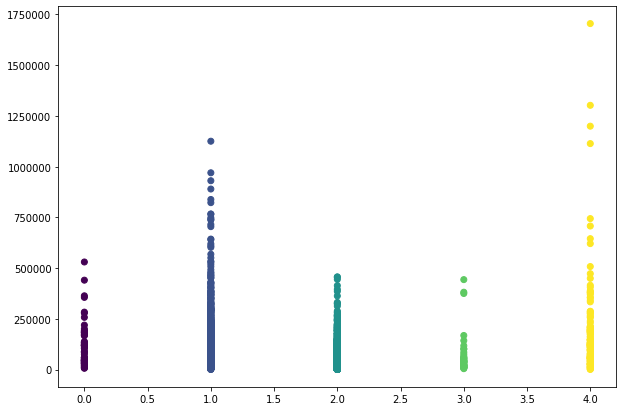

In [93]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clusters_5_id'],airline_data['Balance'], c=clusters_5.labels_)

## DBSCAN Clustering

In [94]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(airline_data_scaler)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [95]:
#Noisy samples are given the label -1.

dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [96]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_DBSCAN'])
cl

,cluster_DBSCAN
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [97]:
airline_data_DBSCAN = pd.concat([airline_data,cl],axis=1)
airline_data_DBSCAN

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_4_id,clusters_5_id,cluster_DBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,2,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2,2,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,2,2,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2,2,0


In [98]:
# Group data by Clusters 

airline_data_DBSCAN.groupby('cluster_DBSCAN').agg(['mean']).reset_index()

,cluster_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_4_id,clusters_5_id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878,0.837805,1.737805
1,0,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000,1.688628,1.855596
2,1,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000,0.877119,1.450212
3,2,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000,2.000000,3.000000
4,3,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000,0.000000,1.000000


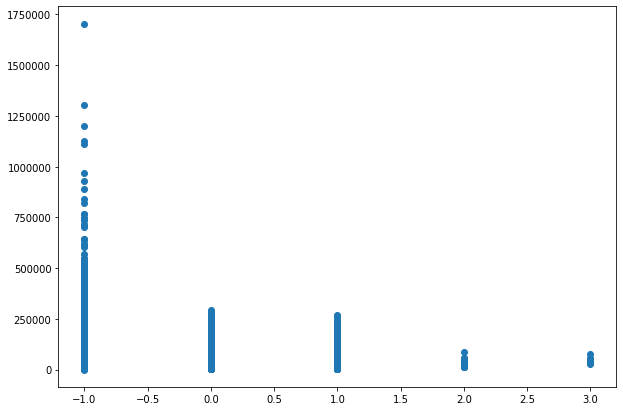

In [67]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(airline_data_DBSCAN['cluster_DBSCAN'],airline_data_5['Balance'])

## Hierarchical Clustering 

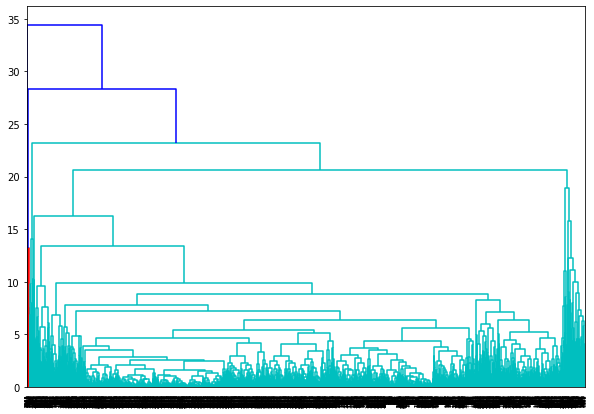

In [99]:
# create dendrogram

plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline_data_scaler,'complete',))
plt.show()

In [74]:
# Create Clusters (y)

hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [76]:
y=pd.DataFrame(hclusters.fit_predict(airline_data_scaler),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [77]:
# Adding clusters to dataset

airline_data['clustersid']=hclusters.labels_
airline_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [78]:
airline_data.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198
1,1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
2,2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


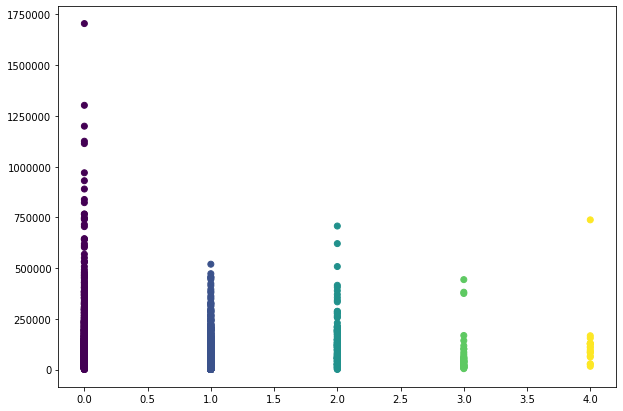

In [79]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['clustersid'],airline_data['Balance'], c=hclusters.labels_)